In [1]:
source("../notebooks_filter/utils_high-depth.R")

Warning message:
“package ‘Cairo’ was built under R version 4.4.3”
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, saveRDS, setdiff,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading requir

In [2]:
seg_merged_data_orig <- read_rds("../notebooks_high-depth-CS_filter/seg_merged_df_LENGTH-filtered.rds")
cell_data_orig <- read_rds("../notebooks_high-depth-CS_filter/cell_data_df_LENGTH-filtered.rds")
cell_data_orig$CN_signal <- cell_data_orig$RDR*cell_data_orig$gamma
seg_merged_data_orig$CN_total <- NA

seg_merged_data_orig$CN <- as.character(seg_merged_data_orig$CN)

# Split CN into two numeric components
cn_split <- str_split(seg_merged_data_orig$CN, "\\|")

# Extract alleles as numeric values
seg_merged_data_orig$CN_A <- as.numeric(sapply(cn_split, `[`, 1))
seg_merged_data_orig$CN_B <- as.numeric(sapply(cn_split, `[`, 2))

# Compute total copy number
sex_chr_mask <- seg_merged_data_orig$chrom %in% c("X", "Y")
seg_merged_data_orig$CN_A[sex_chr_mask & is.na(seg_merged_data_orig$CN_A)] <- 0
seg_merged_data_orig$CN_B[sex_chr_mask & is.na(seg_merged_data_orig$CN_B)] <- 0

seg_merged_data_orig$CN_total <- seg_merged_data_orig$CN_A + seg_merged_data_orig$CN_B


In [3]:
cell_list <- c("SMHT002Lungnuclei16", "SM-OGQSQ", "SMHT002Lung14")

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 290 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 290 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 290 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 266 rows containing missing values or values outs

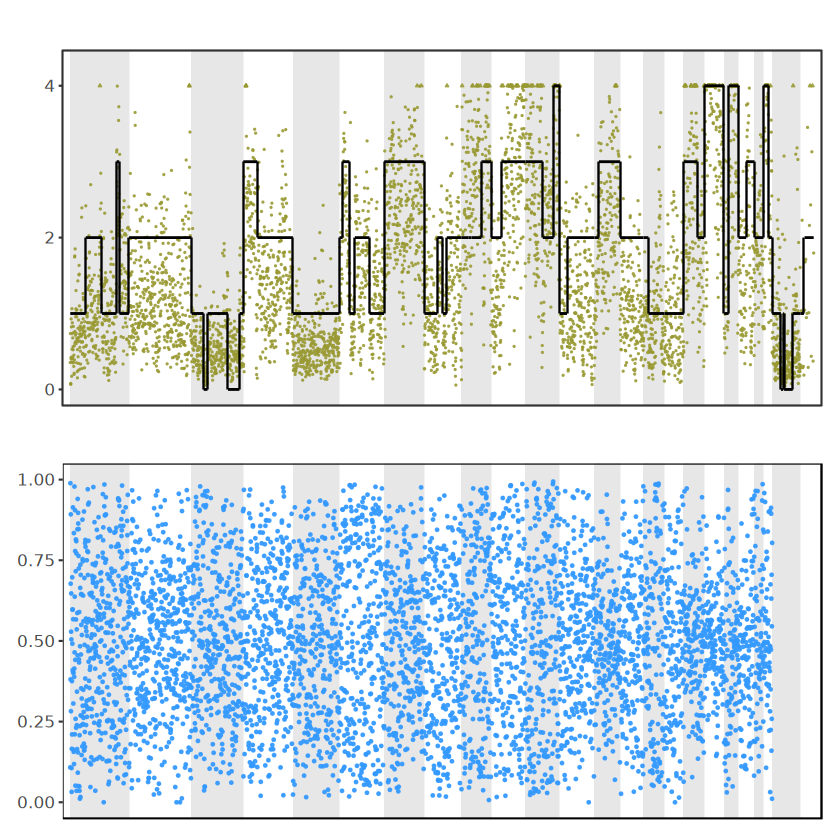

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”
Warning message:
“Removed 251 rows containing missing values or values outside the scale range
(`geom_point()`).”


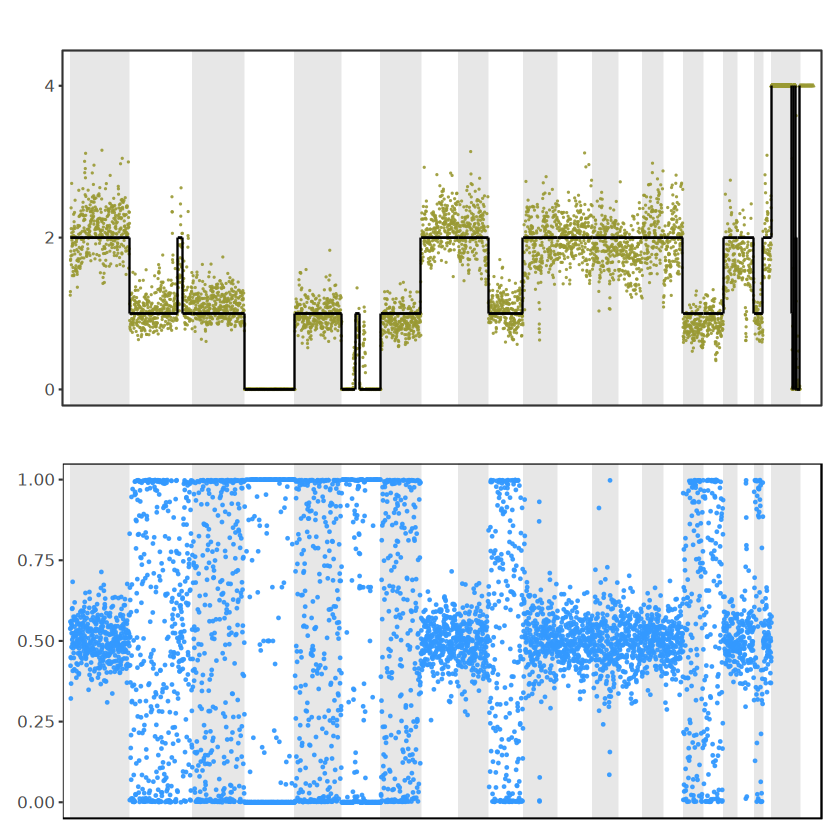

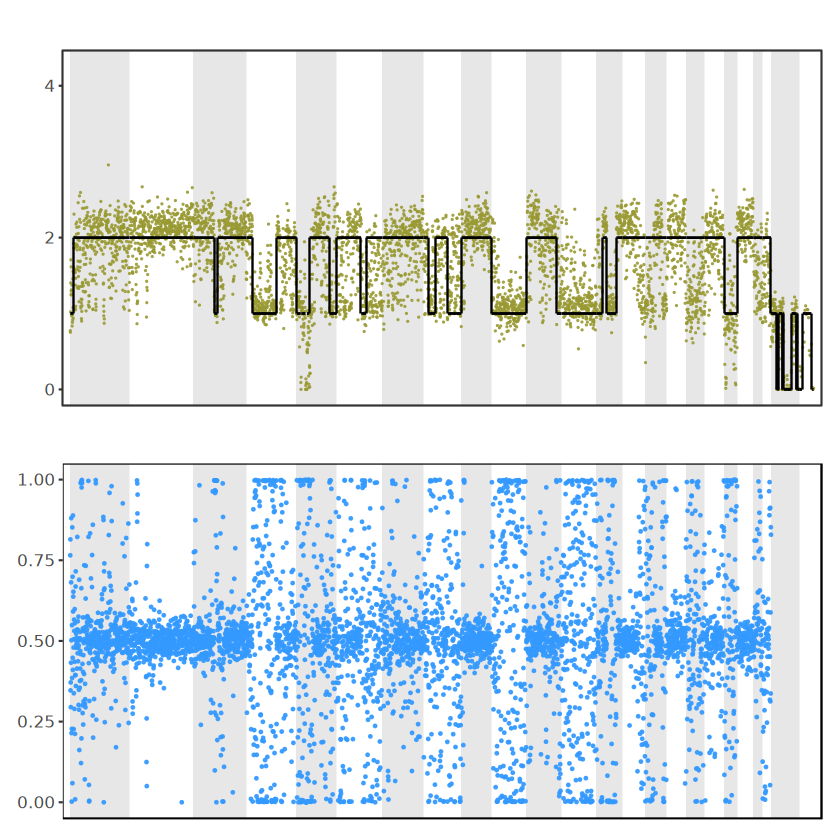

In [4]:
library(patchwork)

for (cell_name in cell_list) {
  
  plot_cell2_supplementary(
    cell_name,
    NULL,
    cell_data_orig,
    seg_merged_data_orig,
    cnv_presence = NULL,
    output_dir = "fig5A_cell_plots",
    print_plot = TRUE,
    chrom_list = c(1:22, "X", "Y")
  )
  
}
